In [247]:
from pydataset import data
import pandas as pd
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [248]:
df_iris = data('iris')
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [249]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [250]:
# print the column names
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [251]:
# print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [252]:
# print the summary statistics for each of the numeric variables
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [253]:
df_google_sheets = pd.read_excel('spreadsheet.xlsx', sheet_name='Table1_CustDetails')
df_google_sheets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   float64
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   float64
 6   internet_service   7049 non-null   float64
 7   contract_type      7049 non-null   float64
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(7), object(6)
memory usage: 716.0+ KB


In [254]:
# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheets.head(100)
df_google_sheets_sample.shape

(100, 13)

In [255]:
# print the number of rows of your original dataframe
df_iris.shape[0]

150

In [256]:
# print the first 5 column names
df_google_sheets.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [257]:
# print the column names that have a data type of object
df_google_sheets.select_dtypes(include='object').columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [258]:
# compute the range for each of the numeric variables.
number_var = df_google_sheets[['monthly_charges', 'total_charges']].describe().T
number_var['range'] = number_var['max'] - number_var['min']
number_var

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


In [259]:
# print the unique values for each of your categorical variables
# I could get a count of unique values for each variable with an object data type.

for col in df_google_sheets.columns:
#     print(col)
    if df_google_sheets[col].dtypes == 'object':
        print(f'{col} has {df_google_sheets[col].nunique()} unique values.')

customer_id has 7043 unique values.
gender has 2 unique values.
partner has 2 unique values.
dependents has 2 unique values.
payment_type has 4 unique values.
churn has 2 unique values.


In [260]:
import acquire #save it in classification folder

In [261]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [262]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,measurement_id
0,1,setosa,5.1,3.5,1.4,0.2,1
1,1,setosa,4.9,3.0,1.4,0.2,2
2,1,setosa,4.7,3.2,1.3,0.2,3
3,1,setosa,4.6,3.1,1.5,0.2,4
4,1,setosa,5.0,3.6,1.4,0.2,5


In [263]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied. 

In [264]:
## functions moved to prepare.py ##

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

In [265]:
df_iris = acquire.get_iris_data()
df_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,measurement_id
0,1,setosa,5.1,3.5,1.4,0.2,1
1,1,setosa,4.9,3.0,1.4,0.2,2
2,1,setosa,4.7,3.2,1.3,0.2,3
3,1,setosa,4.6,3.1,1.5,0.2,4
4,1,setosa,5.0,3.6,1.4,0.2,5


In [266]:
df_iris = prepare.prep_iris(df_iris)
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [267]:
train, validate, test = prepare.split_iris_data(df_iris)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [268]:
validate.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
134,virginica,6.1,2.6,5.6,1.4,0,0,1
62,versicolor,6.0,2.2,4.0,1.0,0,1,0
98,versicolor,5.1,2.5,3.0,1.1,0,1,0
66,versicolor,5.6,3.0,4.5,1.5,0,1,0
121,virginica,5.6,2.8,4.9,2.0,0,0,1


In [269]:
test.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
80,versicolor,5.5,2.4,3.8,1.1,0,1,0
45,setosa,4.8,3.0,1.4,0.3,1,0,0
144,virginica,6.7,3.3,5.7,2.5,0,0,1
110,virginica,6.5,3.2,5.1,2.0,0,0,1
38,setosa,4.4,3.0,1.3,0.2,1,0,0


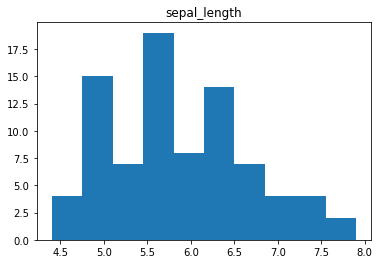

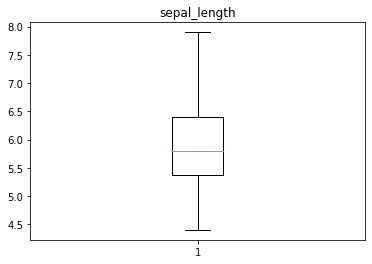

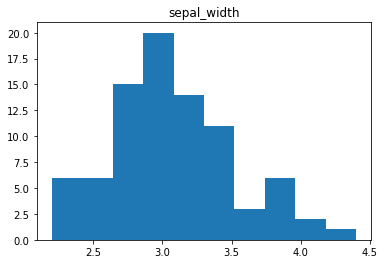

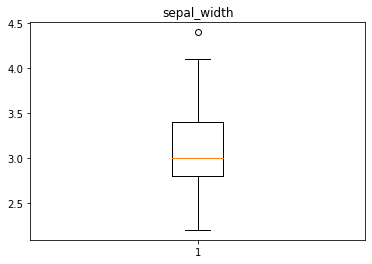

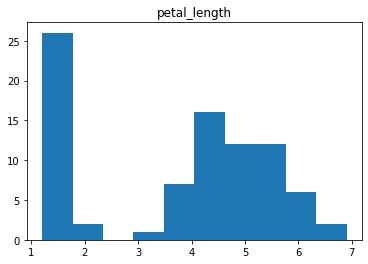

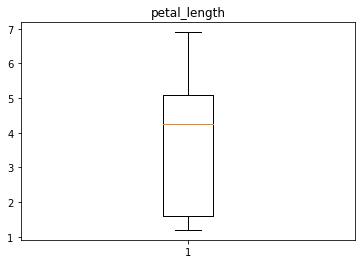

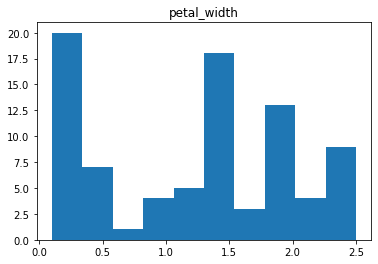

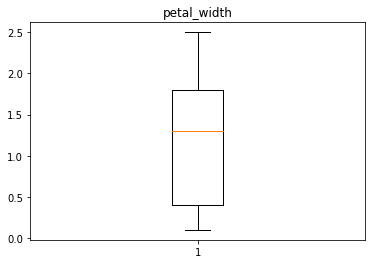

In [270]:
# Univariate Stats
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics 
# (using .describe()).
# Plot numeric columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

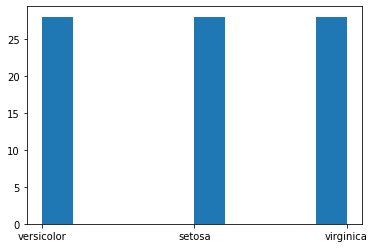

In [271]:
plt.hist(train.species)

# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

 # Document takeaways & any actions.
    
Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

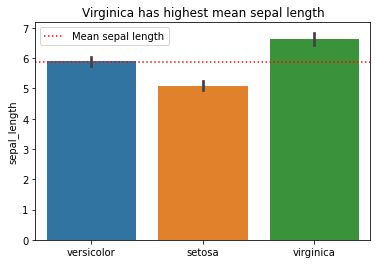

In [272]:
plt.title("Virginica has highest mean sepal length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

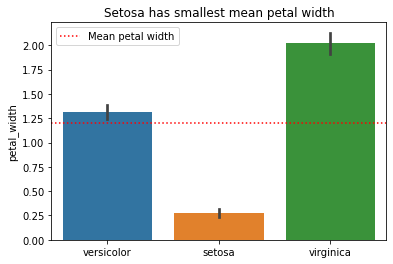

In [273]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [274]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [275]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [276]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


Takeaways:
Species Virignica have largest petals
Species Setosa have smallest petals as well as wide/short.

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

In [277]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,0,1,0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,1,0,0,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,0,0,1,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,0,1,0,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,1,0,0,21.66,0.51


In [278]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]
combos[0]

('sepal_length', 'sepal_width')

In [279]:
train.groupby('species')['sepal_area'].sum()

species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

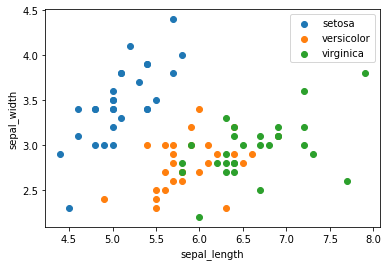

In [280]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        # test it with one plot
scatter_species(x,y)

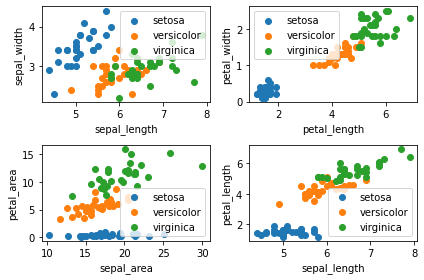

In [281]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

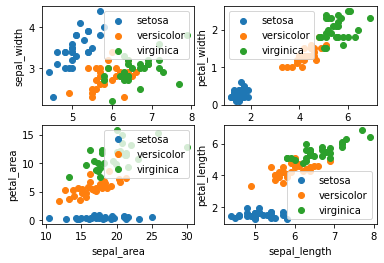

In [282]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

Takeaways

sepal_length is useful, sepal_width not great but likely adds some value.
petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.

In [283]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,-0.722317,0.024224,0.698093,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.623439,-0.442075,-0.181364,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,-0.928394,0.205008,0.723386,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,-0.877707,0.104650,0.773058,0.299920,0.982404
setosa,-0.722317,0.623439,-0.928394,-0.877707,1.000000,-0.500000,-0.500000,-0.052203,-0.816541
versicolor,0.024224,-0.442075,0.205008,0.104650,-0.500000,1.000000,-0.500000,-0.320752,-0.015033
virginica,0.698093,-0.181364,0.723386,0.773058,-0.500000,-0.500000,1.000000,0.372955,0.831575
sepal_area,0.619853,0.673554,0.271618,0.299920,-0.052203,-0.320752,0.372955,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,-0.816541,-0.015033,0.831575,0.373870,1.000000


Takeaways

most measures correlate with each other.

Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

Little to no LINEAR correlation: sepal length & sepal width.

A scatter matrix visualizing the interaction of each variable.

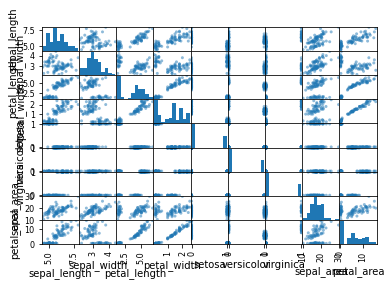

In [284]:
pd.plotting.scatter_matrix(train)
plt.show()

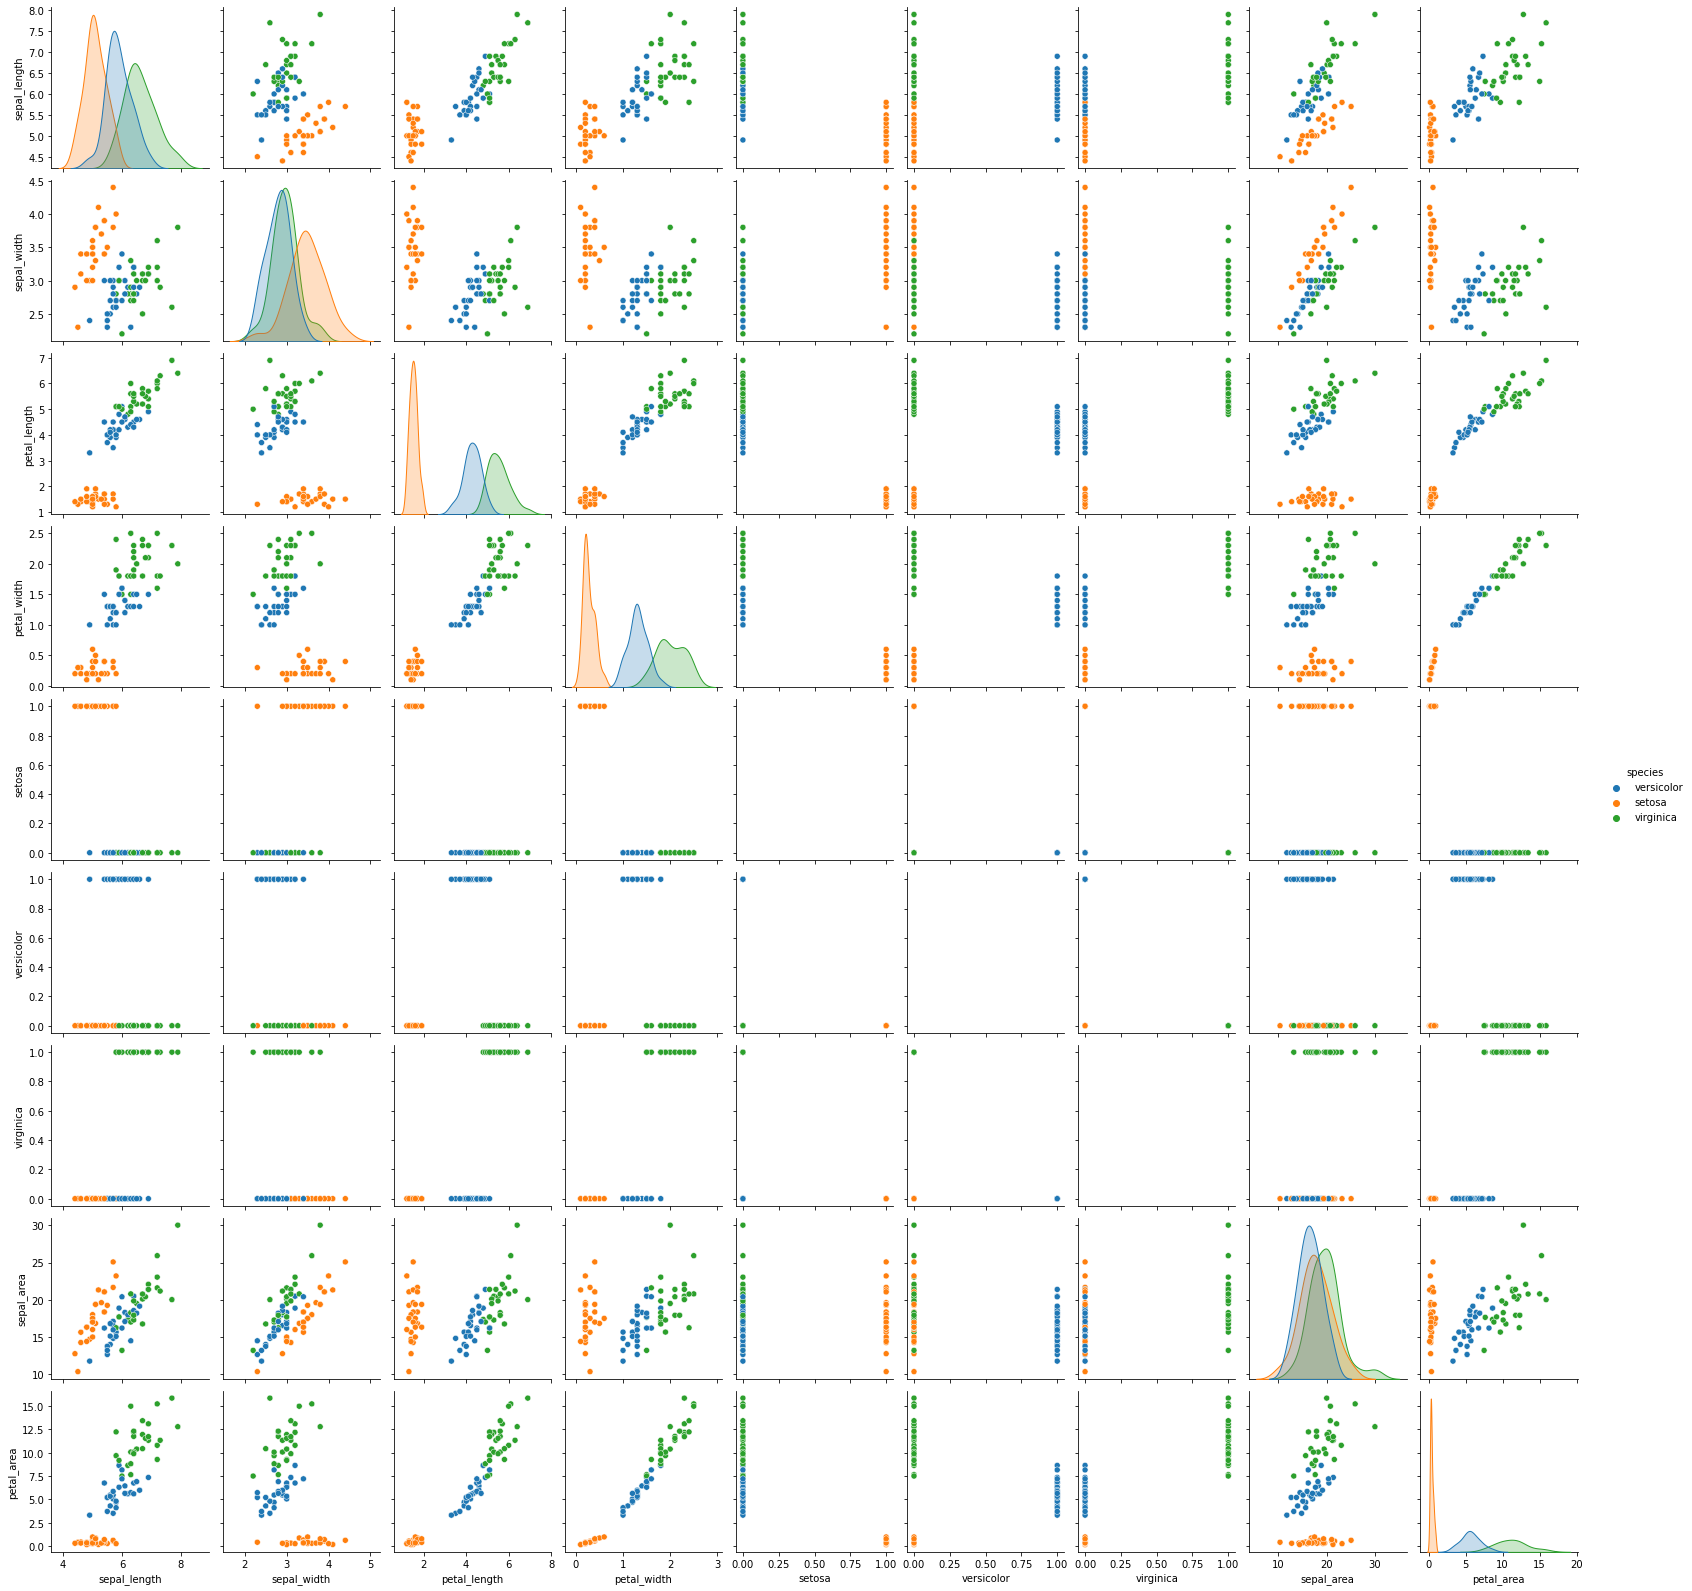

In [285]:
sns.pairplot(train, hue='species')
plt.show()

Takeaways

petal length + petal width show the most seperation between species.
setosa has the shortest and narrowest petals. It will be the easiest to determine.
petal area seems to show the largest separation between virginica & versicolor of all the individual features.
virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
virginica and versicolor show little to no difference when it comes to the width of the sepals.

Hypothesis

alpha = .05

H0: Sepal length is the same in virginica and versicolor.
H1: Sepal length significantly different in virginica and versicolor.

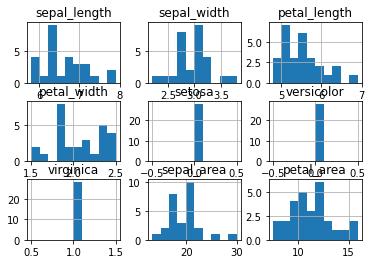

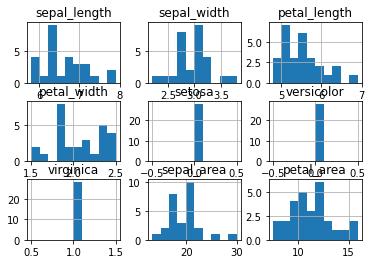

In [286]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']
virginica.hist()
plt.show(())

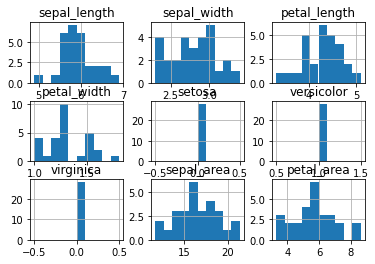

In [287]:
versicolor.hist()
plt.show()

In [288]:
virginica.describe()['sepal_length']['std']

0.5323776159136727

In [289]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

We reject H0 that the sepal length is the same for both groups.

Hypothesis 2:
    
alpha = .05
H0: Sepal width is the same in virginica and versicolor.
H1: Sepal width is very different in virginica and versicolor.

We reject H0 that the sepal width is the same.

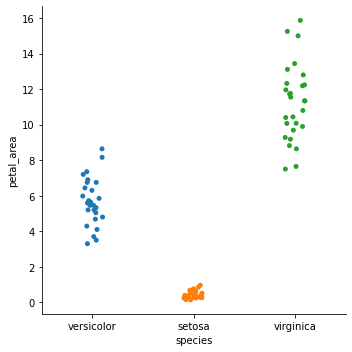

In [290]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

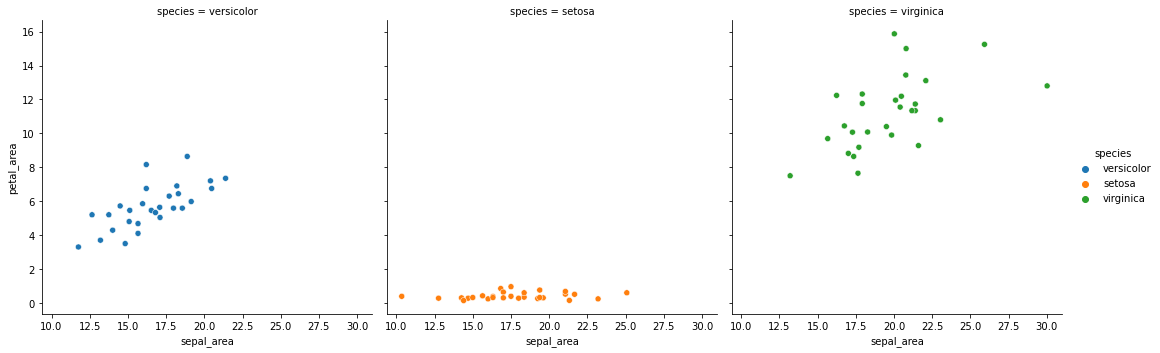

In [291]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [292]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [293]:
train, validate, test = prepare.prep_titanic_data(titanic_df)
train.head()

/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # transform age column in test


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [294]:
validate.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
610,610,0,3,female,39.000000,1,5,31.2750,Southampton,0,0,0,1
424,424,0,3,male,18.000000,1,1,20.2125,Southampton,0,1,0,1
568,568,0,3,male,29.678105,0,0,7.2292,Cherbourg,1,1,0,0
334,334,1,1,female,29.678105,1,0,133.6500,Southampton,0,0,0,1
101,101,0,3,male,29.678105,0,0,7.8958,Southampton,1,1,0,1


Exercises Part III

Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [295]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [296]:
train, validate, test = prepare.prep_telco_data(telco_df)

/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Convert to correct datatype
/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Convert binary categorical variables to numeric
/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [297]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [298]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,1,0,0
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,1,1,0,0,0,0,1,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0


In [299]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [300]:
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

Text(0.5, 0, 'Churned')

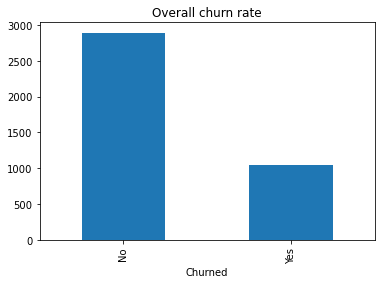

In [302]:
# plot churn
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn_encoded.mean()
plt.title(f"Overall churn rate")
plt.xlabel('Churned')

based on last project, I found that churn was high with specific payment types(electronic check) I'd like to explore that and correlate with gender, which was another note I had made in my project.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


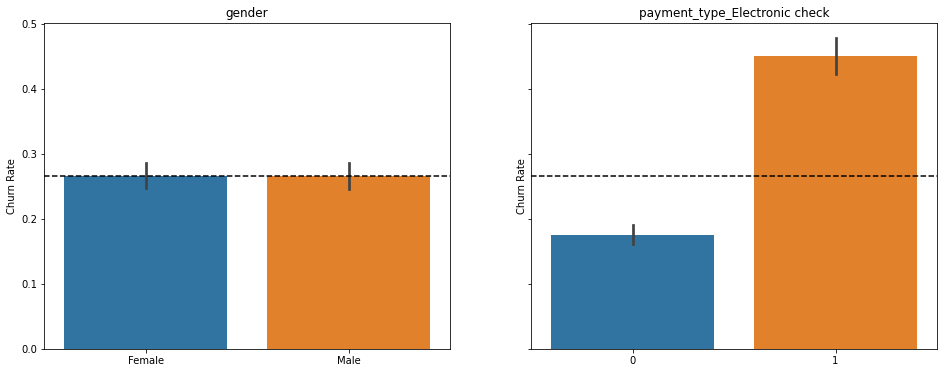

In [307]:
features = ['gender', 'payment_type_Electronic check']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='black')
    
# Doesn't look like gender is an aspect affecting churn

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

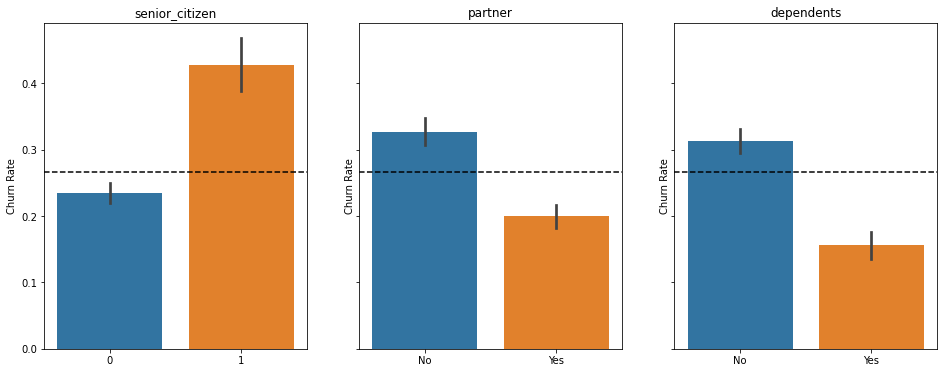

In [311]:
# Another thing that was noticed was that within electronic checks, alot of them churning were senior citizens
# Question: Are dependents/ if they are single something?
features = ['senior_citizen', 'partner', 'dependents']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='black')
    
# Takeaways
# Senior citizens churn more than they DONT
# There is a SLIGHT take showing that if you DONT have a partner or dependents, you don't churn as much

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

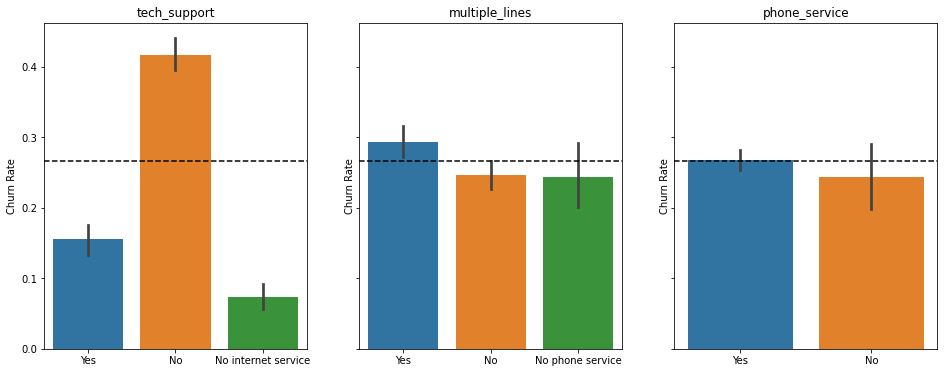

In [314]:
features = ['tech_support', 'multiple_lines', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='black')
    
# TAKEAWAY:
# No tech support has HUGE churn rate
# phone service has little to no relation to churn
# multiple phone lines churn the most, but not by much

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

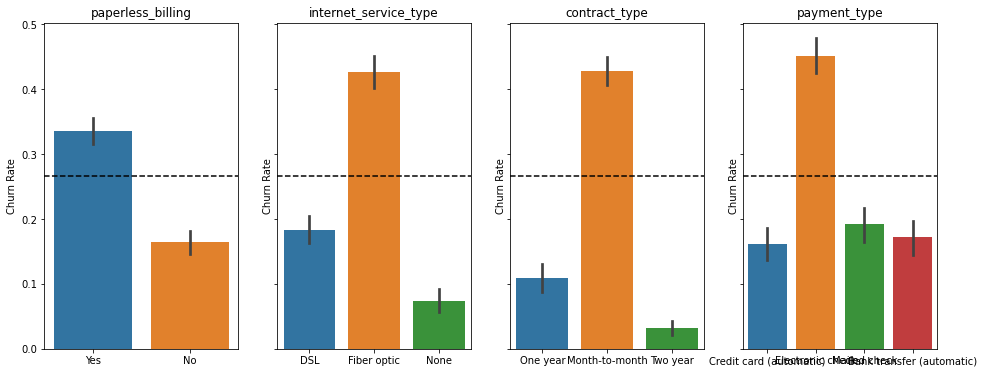

In [317]:
features = ['paperless_billing', 'internet_service_type', 'contract_type', 'payment_type']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='black')
    
# Takeaways:
# Confirmed that the payment type, electronic checks, churn WAY more
# Contract type month to month = HUGE churn
# Internet service type fiber optic HUGE churn
# paperless biling has a decent churn difference for those who are not paperless